In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.pipeline
import sklearn.preprocessing
import sklearn_pandas
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree
import sklearn.ensemble
import sklearn.svm
import sklearn.gaussian_process
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
import sklearn.neural_network
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [13]:
fb_metrics_data = pd.read_csv('dataset_Facebook.csv',sep=";",skipinitialspace=True)
# fb_metrics_data.isnull().values.any()
print(fb_metrics_data.head())

   Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0            139441   Photo         2          12             4          3   
1            139441  Status         2          12             3         10   
2            139441   Photo         3          12             3          3   
3            139441   Photo         2          12             2         10   
4            139441   Photo         2          12             2          3   

   Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0   0.0                       2752                             5091   
1   0.0                      10460                            19057   
2   0.0                       2413                             4373   
3   1.0                      50128                            87991   
4   0.0                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0                     178                      109

In [14]:
fb_metrics_data.describe()

Page total likes    Category  Post Month  Post Weekday   Post Hour  \
count        500.000000  500.000000  500.000000    500.000000  500.000000   
mean      123194.176000    1.880000    7.038000      4.150000    7.840000   
std        16272.813214    0.852675    3.307936      2.030701    4.368589   
min        81370.000000    1.000000    1.000000      1.000000    1.000000   
25%       112676.000000    1.000000    4.000000      2.000000    3.000000   
50%       129600.000000    2.000000    7.000000      4.000000    9.000000   
75%       136393.000000    3.000000   10.000000      6.000000   11.000000   
max       139441.000000    3.000000   12.000000      7.000000   23.000000   

             Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
count  499.000000                  500.00000                     5.000000e+02   
mean     0.278557                13903.36000                     2.958595e+04   
std      0.448739                22740.78789                     7.680325e+04   
min      0.000000                  238.00000                     5.700000e+02   
25%      0.000000                 3315.00000                     5.694750e+03   
50%      0.000000                 5281.00000                     9.051000e+03   
75%      1.000000                13168.00000                     2.208550e+04   
max      1.000000               180480.00000                     1.110282e+06   

       Lifetime Engaged Users  Lifetime Post Consumers  \
count              500.000000               500.000000   
mean               920.344000               798.772000   
std                985.016636               882.505013   
min                  9.000000                 9.000000   
25%                393.750000               332.500000   
50%                625.500000               551.500000   
75%               1062.000000               955.500000   
max              11452.000000             11328.000000   

       Lifetime Post Consumptions  \
count                  500.000000   
mean                  1415.130000   
std                   2000.594118   
min                      9.000000   
25%                    509.250000   
50%                    851.000000   
75%                   1463.000000   
max                  19779.000000   

       Lifetime Post Impressions by people who have liked your Page  \
count                                       5.000000e+02              
mean                                        1.676638e+04              
std                                         5.979102e+04              
min                                         5.670000e+02              
25%                                         3.969750e+03              
50%                                         6.255500e+03              
75%                                         1.486050e+04              
max                                         1.107833e+06              

       Lifetime Post reach by people who like your Page  \
count                                        500.000000   
mean                                        6585.488000   
std                                         7682.009405   
min                                          236.000000   
25%                                         2181.500000   
50%                                         3417.000000   
75%                                         7989.000000   
max                                        51456.000000   

       Lifetime People who have liked your Page and engaged with your post  \
count                                         500.000000                     
mean                                          609.986000                     
std                                           612.725618                     
min                                             9.000000                     
25%                                           291.000000                     
50%                                           412.000000                     
75%     

In [15]:
fb_metrics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [16]:
le = sklearn.preprocessing.LabelEncoder()
fb_metrics_data['Type'] = le.fit(fb_metrics_data['Type']).transform(fb_metrics_data['Type'])

In [17]:
fb_metrics_data.replace([np.inf, -np.inf], np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='mean').fit(fb_metrics_data)
imp.transform(fb_metrics_data);
fb_metrics_data.isnull().values.any()


True

In [18]:
# fb_metrics_data[fb_metrics_data.columns[0] == np.nan]
# fb_metrics_data.columns[0]\
for i in range(0, 29, 1):
    a = fb_metrics_data[fb_metrics_data[fb_metrics_data.columns[2]] == '  ']
    if a.shape[0] > 0:
        print(i)
print("DOne")

DOne


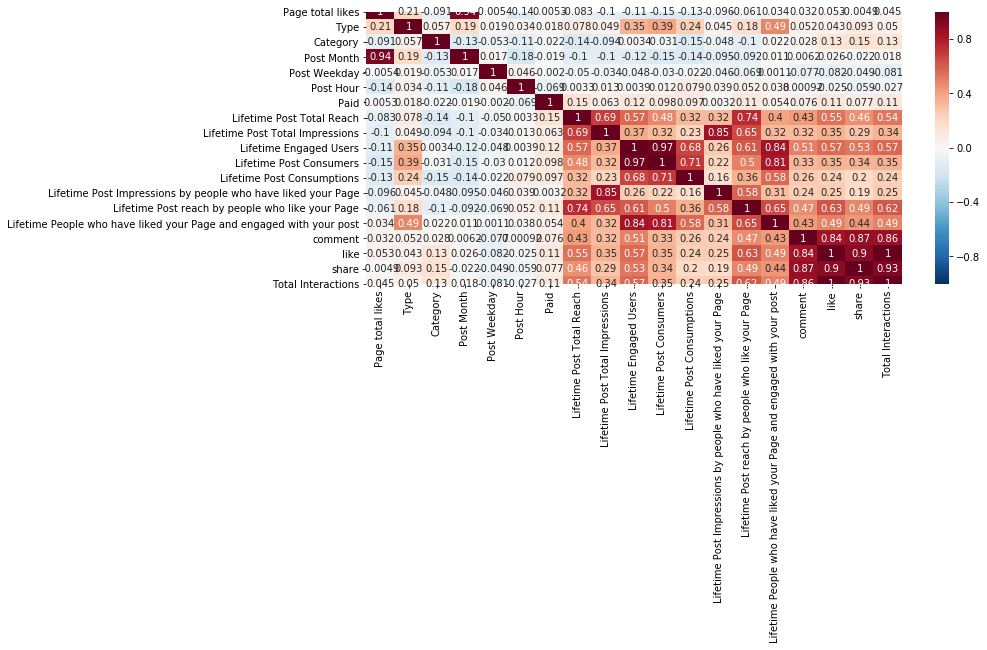

In [19]:
corr = fb_metrics_data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r");

In [20]:
#we can remove colns which has less correlation with quality
y = fb_metrics_data[fb_metrics_data.columns[-1]].values
fb_metrics_data.drop(fb_metrics_data.columns[-1], axis=1, inplace=True,)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(fb_metrics_data, y, test_size=0.2, random_state=0,)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [21]:
#scaling train data
scale_cols = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scale_cols.transform(X_train)

#scaling test data
scale_test_cols = sklearn.preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scale_test_cols.transform(X_test)

#K fold
strat_kfold = sklearn.model_selection.StratifiedKFold(2, random_state=0,)

In [29]:
#Linear Regression
linear_regression = sklearn.linear_model.LinearRegression()

estimator = sklearn.model_selection.GridSearchCV(
    linear_regression,
    param_grid={
        "fit_intercept": [True, False,],
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)


#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'fit_intercept': True}
Root Mean Squared 10.29390172294345
Mean absolute error 2.5202184697077
Performance on testing data
Root Mean Squared 131.03214158347998
Mean absolute error 65.61945950328251


In [23]:
#Decision Tree Regression
md = [1,2,3,4,5,10,15,20,25,30,35,40]
dt_model = sklearn.tree.DecisionTreeRegressor(random_state=0)
splitter=['best', 'random']
estimator = sklearn.model_selection.GridSearchCV(
    dt_model,
    param_grid={
        "splitter": ['best', 'random'],
        "max_depth": md,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'max_depth': 5, 'splitter': 'best'}
Root Mean Squared 23.747771079208164
Mean absolute error 17.539231632582457
Performance on testing data
Root Mean Squared 84.51417875178976
Mean absolute error 44.57929088050357


In [24]:
#Random forest regression
md = [5,10,15,20,25,30,35,40]
ne = [20,25,30,35,40,45,47,50]
rf_model = sklearn.ensemble.RandomForestRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    rf_model,
    param_grid={
        "n_estimators": ne,
        "max_depth": md,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)
# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'max_depth': 20, 'n_estimators': 30}
Root Mean Squared 65.45642950764187
Mean absolute error 11.994916666666668
Performance on testing data
Root Mean Squared 138.4361385059712
Mean absolute error 55.599999999999994


In [25]:
#Ada boost ensemble
ne=[10,20,30,40,50,60,70]
lr=[0.1,0.2,0.3,0.4,0.5,0.6,0.8,1.0]
ab_model = sklearn.ensemble.AdaBoostRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    ab_model,
    param_grid={
        "n_estimators": ne,
        "learning_rate": lr,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'learning_rate': 0.3, 'n_estimators': 30}
Root Mean Squared 47.27753081997289
Mean absolute error 37.0238640545238
Performance on testing data
Root Mean Squared 81.84468805887528
Mean absolute error 47.56978366722882


In [26]:
#Gaussian Process regression
ker = [DotProduct(), WhiteKernel(), RBF()]
gp = sklearn.gaussian_process.GaussianProcessRegressor(random_state=0)
estimator = sklearn.model_selection.GridSearchCV(
    gp,
    param_grid={
        "kernel": ker,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'kernel': DotProduct(sigma_0=1)}
Root Mean Squared 10.29402350592414
Mean absolute error 2.520930080413818
Performance on testing data
Root Mean Squared 131.02871782396866
Mean absolute error 65.61760147094726


In [27]:
#Neural Network Regression
hls = [(2,),(4,),(7,),(8,),(10,)]
a = ['identity', 'tanh', 'relu']
s = ['lbfgs', 'sgd', 'adam']
nn = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(4,), activation='relu')
estimator = sklearn.model_selection.GridSearchCV(
    nn,
    param_grid={
        "hidden_layer_sizes": hls,
        "activation": a,
#         "solver": s,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'activation': 'relu', 'hidden_layer_sizes': (8,)}
Root Mean Squared 446.48240103162806
Mean absolute error 211.57639893838612
Performance on testing data
Root Mean Squared 312.78468707792996
Mean absolute error 181.14189392492645


In [28]:
#SVM Regression
ker = ['rbf','linear','sigmoid']
svm_model = sklearn.svm.SVR()
estimator = sklearn.model_selection.GridSearchCV(
    svm_model,
    param_grid={
        "kernel": ker,
    },
    cv=strat_kfold,
)
estimator.fit(X_train_scaled, y_train)
y_predicted = estimator.predict(X_train_scaled)

#best hyperparameter
print("best params",estimator.best_params_)

# Root Mean Squared
train_rmse = sklearn.metrics.mean_squared_error(y_train, y_predicted) ** 0.5
print("Root Mean Squared",train_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
train_mae = sklearn.metrics.mean_absolute_error(y_train, y_predicted)
print("Mean absolute error", train_mae)

#Performance on testing data
print("Performance on testing data")
y_test_predicted = estimator.predict(X_test_scaled)
# Root Mean Squared
test_rmse = sklearn.metrics.mean_squared_error(y_test, y_test_predicted) ** 0.5
print("Root Mean Squared",test_rmse)
# Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works.
# Mean absolute error
test_mae = sklearn.metrics.mean_absolute_error(y_test, y_test_predicted)
print("Mean absolute error", test_mae)

best params {'kernel': 'linear'}
Root Mean Squared 126.09716811167996
Mean absolute error 46.43795730052658
Performance on testing data
Root Mean Squared 64.8791741254583
Mean absolute error 45.410562681286045
